In [61]:
# Mochammad Naufal Septifiandi
# 101319002

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib

In [3]:
from sklearn import preprocessing

# 1. Data Pre-processing

## 1.1 Import Data

In [4]:
df_raw_1 = pd.read_csv('UP-5.csv')
df_raw_1

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Mikasa Anhydrite,2481,2480.79,11.5,17,737.4,3289,137,6867,11.0,11.080,60,50.07,23/06/2010 00.50.17
2054,Mikasa Anhydrite,2482,2481.80,25.6,13,737.1,3291,136,7945,11.0,11.080,60,50.14,23/06/2010 00.54.48
2055,Mikasa Anhydrite,2483,2482.80,36.7,7,735.2,3298,127,5831,11.0,11.080,59,50.19,23/06/2010 01.28.56
2056,Mikasa Anhydrite,2484,2483.79,22.5,11,733.7,3290,135,7808,11.0,11.080,59,50.28,23/06/2010 01.34.33


In [5]:
df_raw_2 = pd.read_csv('UP-6.csv')
df_raw_2

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.00,18,18.02,25.6,2,152.4,10,62,1363,8.700,8.700,0,0.04,28/07/2010 12.17.20
1,Mio,24.00,19,19.00,35.5,2,152.2,10,57,649,8.700,8.700,0,0.11,28/07/2010 12.21.35
2,Mio,24.00,20,19.50,20.6,2,114.3,8,43,0,8.700,8.700,0,0.17,28/07/2010 12.46.54
3,Mio,24.00,21,19.50,20.1,2,152.3,10,58,0,8.700,8.700,0,0.17,28/07/2010 12.25.31
4,Mio,24.00,22,19.50,19.9,2,152.3,10,58,0,8.700,8.700,0,0.17,28/07/2010 12.25.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Mikasa Ahydrite,12.25,2526,2525.84,71.1,14,747.4,4053,194,10971,10.878,11.011,36,41.05,08/08/2010 06.47.37
2509,Mikasa Ahydrite,12.25,2527,2526.77,84.7,14,747.2,4053,193,10854,10.899,11.026,36,41.08,08/08/2010 06.49.41
2510,Mikasa Ahydrite,12.25,2528,2527.78,43.6,15,747.3,4054,191,11444,10.862,11.020,35,41.13,08/08/2010 06.52.14
2511,Mikasa Ahydrite,12.25,2529,2528.78,64.1,15,746.6,4056,192,10357,10.852,11.030,35,41.15,08/08/2010 06.53.22


## 1.2 Show Statistics from Raw Data

In [6]:
df_raw_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMD (m),2058.0,1456.500000,594.237747,428.000,942.2500,1456.500,1970.7500,2485.00
TVD (m),2058.0,1456.411924,594.199795,428.010,942.1775,1456.425,1970.6675,2484.79
ROP (m/hr),2058.0,72.522935,32.636414,3.100,49.7250,67.200,91.8750,203.20
WOB (ton),2058.0,8.744412,3.591133,0.000,7.0000,9.000,11.0000,22.00
FR (gpm),2058.0,824.538387,34.861439,428.800,815.2000,823.400,844.3000,1130.50
SPP (psi),2058.0,2959.543246,581.566385,547.000,2434.5000,2901.000,3443.5000,3966.00
RPM (rpm),2058.0,156.351312,23.840552,70.000,146.0000,158.000,167.0000,199.00
TQ (lb.ft),2058.0,9213.728377,3168.341569,784.000,6946.5000,9147.500,11404.5000,19822.00
MW IN (ppg),2058.0,10.852662,0.250399,10.400,10.5000,11.000,11.0000,11.00
MW OUT (ppg),2058.0,10.872496,0.262644,10.388,10.5560,10.900,11.0800,11.08


In [7]:
df_raw_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BIT SIZE (in),2513.0,13.040092,2.105961,12.250,12.250,12.250,12.250,24.000
TMD (m),2513.0,1274.000000,725.584936,18.000,646.000,1274.000,1902.000,2530.000
TVD (m),2513.0,1273.917839,725.552343,18.020,646.000,1273.940,1901.870,2529.770
ROP (m/hr),2513.0,84.100398,42.813343,2.700,50.800,77.400,115.800,309.100
WOB (ton),2513.0,9.636689,3.502575,0.000,7.000,10.000,12.000,21.000
FR (gpm),2513.0,764.088977,135.322381,114.300,766.100,796.500,828.300,1410.900
SPP (psi),2513.0,3006.333068,1262.556996,8.000,2362.000,3317.000,4009.000,4416.000
RPM (rpm),2513.0,140.845603,33.564465,21.000,134.000,150.000,164.000,196.000
TQ (lb*ft),2513.0,7737.759650,3199.764775,0.000,5524.000,8166.000,10033.000,18147.000
MW IN (ppg),2513.0,10.543717,0.798868,8.420,10.577,10.919,10.977,11.208


In [8]:
df_raw_1.columns.to_list()

['Formation',
 'TMD (m)',
 'TVD (m)',
 'ROP (m/hr)',
 'WOB (ton)',
 'FR (gpm)',
 'SPP (psi)',
 'RPM (rpm)',
 'TQ (lb.ft)',
 'MW IN (ppg)',
 'MW OUT (ppg)',
 'RETURN (%)',
 'BIT TIME (hr)',
 'DATE TIME']

In [9]:
df_raw_2.columns.to_list()

['FORMATION',
 'BIT SIZE (in)',
 'TMD (m)',
 'TVD (m)',
 'ROP (m/hr)',
 'WOB (ton)',
 'FR (gpm)',
 'SPP (psi)',
 'RPM (rpm)',
 'TQ (lb*ft)',
 'MW IN (ppg)',
 'MW OUT (ppg)',
 'RETURN (%)',
 'BIT TIME (hr)',
 'DATE TIME']

## 1.3 Rename Column Names

In [10]:
df_raw_1.columns = [
    'FORMATION',
    'TMD (m)',
    'TVD (m)',
    'ROP (m/hr)',
    'WOB (ton)',
    'FR (gpm)',
    'SPP (psi)',
    'RPM (rpm)',
    'TQ (lb*ft)',
    'MW IN (ppg)',
    'MW OUT (ppg)',
    'RETURN (%)',
    'BIT TIME (hr)',
    'DATE TIME'
]

In [11]:
df_raw_1.head()

,FORMATION,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [12]:
df_raw_2.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


## 1.4 Exclude Different Parameters

In [13]:
df_raw_2 = df_raw_2.drop(labels=['BIT SIZE (in)'], axis=1)

In [14]:
df_raw_2.head()

,FORMATION,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


## 1.5 Check for NaN Values

In [15]:
df_raw_1.isnull().values.any()

False

In [16]:
df_raw_2.isnull().values.any()

False

## 1.6 Finalize Initial Data

In [17]:
df_init_1 = df_raw_1.drop(labels=['ROP (m/hr)'], axis=1).copy()
df_init_1['ROP (m/hr)'] = df_raw_1['ROP (m/hr)']

df_init_2 = df_raw_2.drop(labels=['ROP (m/hr)'], axis=1).copy()
df_init_2['ROP (m/hr)'] = df_raw_2['ROP (m/hr)']

In [18]:
df_init_1.head()

,FORMATION,TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME,ROP (m/hr)
0,Seno,428,428.01,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15,33.3
1,Seno,429,429.01,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23,39.3
2,Seno,430,430.00,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43,26.7
3,Seno,431,430.99,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13,29.1
4,Seno,432,432.00,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52,40.8


In [19]:
df_init_2.head()

,FORMATION,TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME,ROP (m/hr)
0,Mio,18,18.02,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20,25.6
1,Mio,19,19.00,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35,35.5
2,Mio,20,19.50,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54,20.6
3,Mio,21,19.50,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31,20.1
4,Mio,22,19.50,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31,19.9


In [20]:
df_init_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMD (m),2058.0,1456.500000,594.237747,428.000,942.2500,1456.500,1970.7500,2485.00
TVD (m),2058.0,1456.411924,594.199795,428.010,942.1775,1456.425,1970.6675,2484.79
WOB (ton),2058.0,8.744412,3.591133,0.000,7.0000,9.000,11.0000,22.00
FR (gpm),2058.0,824.538387,34.861439,428.800,815.2000,823.400,844.3000,1130.50
SPP (psi),2058.0,2959.543246,581.566385,547.000,2434.5000,2901.000,3443.5000,3966.00
RPM (rpm),2058.0,156.351312,23.840552,70.000,146.0000,158.000,167.0000,199.00
TQ (lb*ft),2058.0,9213.728377,3168.341569,784.000,6946.5000,9147.500,11404.5000,19822.00
MW IN (ppg),2058.0,10.852662,0.250399,10.400,10.5000,11.000,11.0000,11.00
MW OUT (ppg),2058.0,10.872496,0.262644,10.388,10.5560,10.900,11.0800,11.08
RETURN (%),2058.0,62.658892,1.605554,40.000,62.0000,63.000,64.0000,65.00


In [21]:
df_init_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMD (m),2513.0,1274.000000,725.584936,18.000,646.000,1274.000,1902.000,2530.000
TVD (m),2513.0,1273.917839,725.552343,18.020,646.000,1273.940,1901.870,2529.770
WOB (ton),2513.0,9.636689,3.502575,0.000,7.000,10.000,12.000,21.000
FR (gpm),2513.0,764.088977,135.322381,114.300,766.100,796.500,828.300,1410.900
SPP (psi),2513.0,3006.333068,1262.556996,8.000,2362.000,3317.000,4009.000,4416.000
RPM (rpm),2513.0,140.845603,33.564465,21.000,134.000,150.000,164.000,196.000
TQ (lb*ft),2513.0,7737.759650,3199.764775,0.000,5524.000,8166.000,10033.000,18147.000
MW IN (ppg),2513.0,10.543717,0.798868,8.420,10.577,10.919,10.977,11.208
MW OUT (ppg),2513.0,10.567039,0.778417,7.706,10.543,10.892,11.048,11.261
RETURN (%),2513.0,36.929168,6.737379,0.000,37.000,39.000,40.000,42.000


# 2. Exploratory Data Analysis & Feature Selection

## 2.1 Pairplot

In [60]:
# sns.pairplot(df_init_1)
# tidak jadi dilakukan karena plotnya akan terlalu banyak

## 2.2 Spearman Correlation Matrix

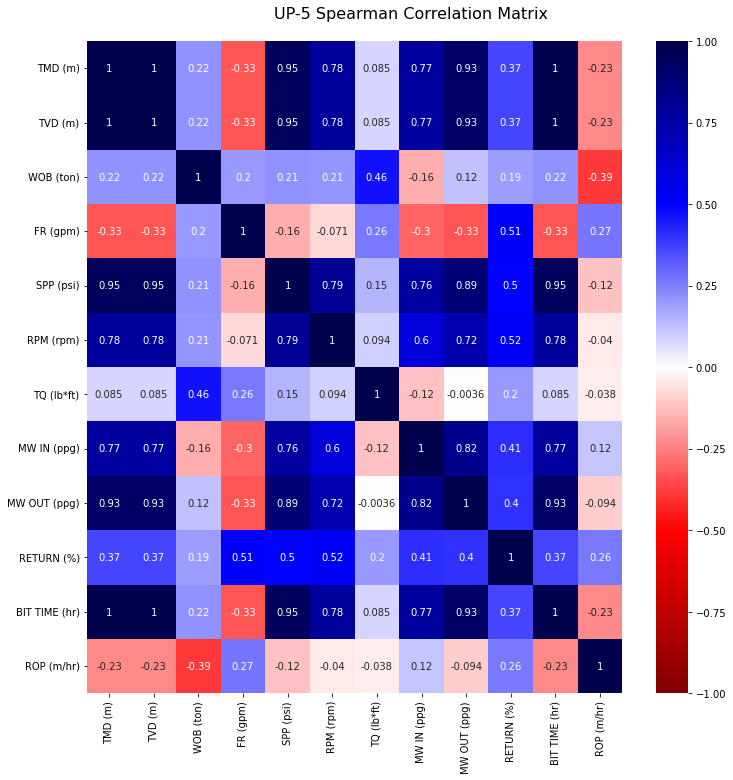

In [23]:
# Exclude Formation, since it is not numeric
plt.figure(figsize=(12,12))
plt.suptitle('UP-5 Spearman Correlation Matrix', fontsize=16, y=0.92)
sns.heatmap(df_init_1.corr('spearman'), annot=True, vmin=-1, vmax=1, cmap='seismic_r')
plt.show()

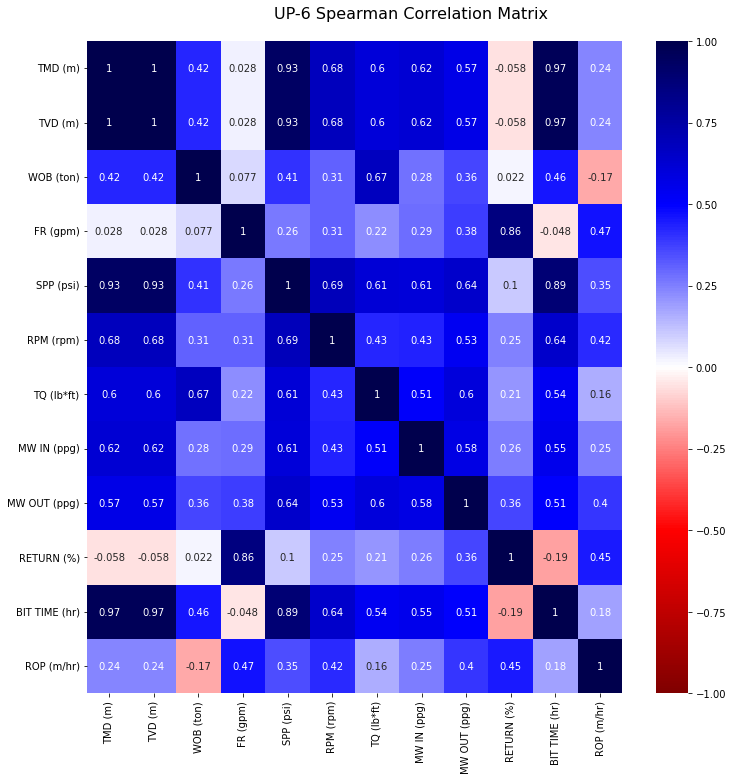

In [24]:
plt.figure(figsize=(12,12))
plt.suptitle('UP-6 Spearman Correlation Matrix', fontsize=16, y=0.92)
sns.heatmap(df_init_2.corr('spearman'), annot=True, vmin=-1, vmax=1, cmap='seismic_r')
plt.show()

## 2.3 Spearman Rank

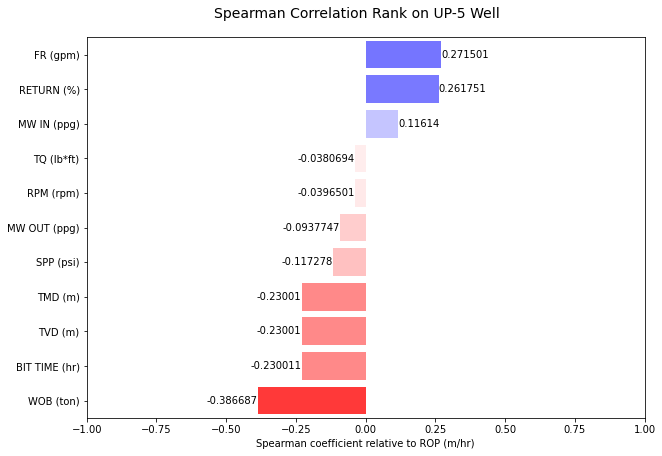

In [25]:
rank_spear_1 = df_init_1.corr('spearman').loc[:,'ROP (m/hr)'].drop('ROP (m/hr)').sort_values(ascending=False)

cmap = matplotlib.cm.get_cmap('seismic_r')
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_1.values))

fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('Spearman Correlation Rank on UP-5 Well', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_1.values,
    y=rank_spear_1.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP (m/hr)')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
plt.show()

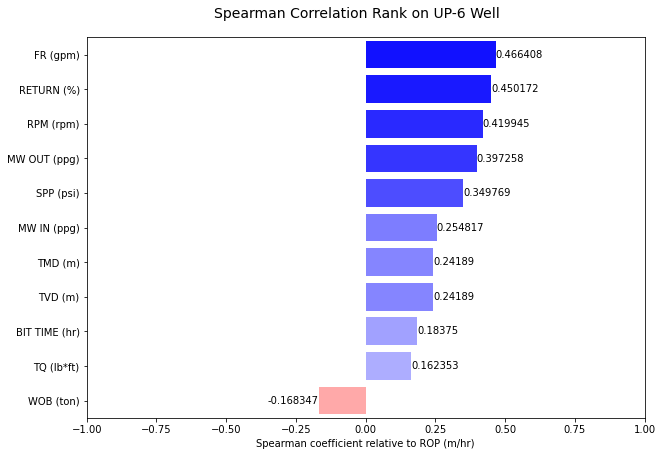

In [26]:
rank_spear_2 = df_init_2.corr('spearman').loc[:,'ROP (m/hr)'].drop('ROP (m/hr)').sort_values(ascending=False)

cmap = matplotlib.cm.get_cmap('seismic_r')
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
rgba = cmap(norm(rank_spear_2.values))

fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('Spearman Correlation Rank on UP-6 Well', fontsize=14, y=0.94)
ax = sns.barplot(
    x=rank_spear_2.values,
    y=rank_spear_2.index.values,
    palette=rgba,
    saturation=1,
)
ax.set_xlim(-1, 1)
ax.set_xlabel('Spearman coefficient relative to ROP (m/hr)')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
plt.show()

In [27]:
# Select features from the spearman rank and domain knowledge
parameters = [
    'FR (gpm)',
    'RETURN (%)',
    'RPM (rpm)',
    'MW OUT (ppg)',
    'SPP (psi)',
    'MW IN (ppg)',
    'TMD (m)',
    'WOB (ton)'
]

# 3. Model Selection and Evaluation

## 3.1 Train & Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_init_2[parameters],
    df_init_2['ROP (m/hr)'],
    test_size=0.1,
    shuffle=True,
    random_state=7
)

In [29]:
X_test

,FR (gpm),RETURN (%),RPM (rpm),MW OUT (ppg),SPP (psi),MW IN (ppg),TMD (m),WOB (ton)
1961,804.1,38,153,10.759,4098,10.974,1979,11
1926,807.0,38,158,10.759,4098,11.036,1944,12
26,185.8,0,66,8.700,10,8.700,44,2
170,489.2,23,100,8.900,327,8.900,188,5
1761,793.0,39,165,10.906,3876,10.920,1779,10
...,...,...,...,...,...,...,...,...
1672,847.7,39,169,11.010,4112,10.797,1690,9
232,378.5,25,89,8.900,226,8.900,250,11
1039,830.8,40,151,10.762,3185,10.958,1057,9
1505,837.8,40,165,11.127,3922,10.789,1523,15


## 2.2 Random Forest with k-Fold Cross Validation

### 2.2.1 Hyperparameter Tuning (1st)

In [30]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, cross_val_score, HalvingGridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid = {
    'n_estimators': [50],
    'max_depth': [2, 10],
    'max_features': [2, 8],
    'min_samples_leaf': [1, 10],
    'min_samples_split': [2, 10]
}

regressor = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    max_features=8,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=7
)

kf = KFold(n_splits=5)

search = HalvingGridSearchCV(regressor, grid, cv=kf, n_jobs=-1, random_state=7)

results = search.fit(X_train, y_train)

In [31]:
results.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [32]:
results.best_score_

0.815986332526751

### 2.2.2 Hyperparameter Tuning (2nd) (Validation Curve)

In [33]:
new_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=results.best_params_['max_depth'],
    max_features=results.best_params_['max_features'],
    min_samples_leaf=results.best_params_['min_samples_leaf'],
    min_samples_split=results.best_params_['min_samples_split']
)
from sklearn.model_selection import validation_curve

param_range=np.linspace(10, 150, 10, dtype=int)
train_scores, valid_scores = validation_curve(
    new_model,
    X_train,
    y_train,
    param_name='n_estimators',
    param_range=param_range,
    cv=kf
)

In [34]:
valid_scores

array([[0.80907208, 0.77246842, 0.82160101, 0.80282214, 0.79366029],
       [0.80205846, 0.79157961, 0.82908466, 0.8080295 , 0.8094173 ],
       [0.80799265, 0.79266711, 0.82820074, 0.81420873, 0.81112451],
       [0.80704151, 0.80030333, 0.83672252, 0.81073683, 0.81590212],
       [0.81144785, 0.79823131, 0.83422317, 0.81642564, 0.80893481],
       [0.8126942 , 0.79915202, 0.83843319, 0.81881107, 0.80630681],
       [0.81235278, 0.79503126, 0.83996841, 0.81871206, 0.8138132 ],
       [0.80671884, 0.79819916, 0.83661347, 0.81515519, 0.8132803 ],
       [0.81043714, 0.80038941, 0.83802335, 0.8216516 , 0.81322183],
       [0.80800851, 0.80408818, 0.83873488, 0.82147772, 0.81095233]])

In [35]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

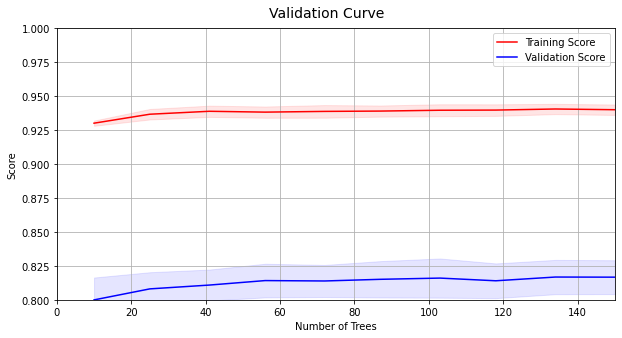

In [36]:
plt.figure(figsize=(10,5))
plt.suptitle('Validation Curve', fontsize=14, y=0.94)
plt.plot(param_range, train_scores_mean, label='Training Score', color='red')
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, color='red', alpha=0.1)
plt.plot(param_range,
             valid_scores_mean,
             label='Validation Score',
             color='blue')
plt.fill_between(param_range, 
                 valid_scores_mean - valid_scores_std, 
                 valid_scores_mean + valid_scores_std, color='blue', alpha=0.1)
plt.legend()
plt.ylabel('Score')
plt.xlabel('Number of Trees')
plt.xlim(0, 150)
plt.ylim(0.8,1)
plt.grid()

In [37]:
# Sehingga, didapatkan best parameters:
best_params = {
    'n_estimators': 90,
    'max_depth': results.best_params_['max_depth'],
    'max_features': results.best_params_['max_features'],
    'min_samples_leaf': results.best_params_['min_samples_leaf'],
    'min_samples_split': results.best_params_['min_samples_split']
}
best_params

{'n_estimators': 90,
 'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [38]:
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split']
)

## 2.3 Learning Curve

In [39]:
from sklearn.model_selection import learning_curve
learn_train_sizes = np.linspace(0.05, 1, 10)
learn_train_sizes, learn_train_scores, learn_test_scores, fit_times, _ = learning_curve(
    best_model,
    X_train,
    y_train,
    cv=kf,
    train_sizes=learn_train_sizes,
    return_times=True
)

In [40]:
learn_test_scores

array([[0.60749063, 0.54100149, 0.54467208, 0.54771765, 0.53861078],
       [0.68620326, 0.6394263 , 0.67271576, 0.68129446, 0.67541684],
       [0.73344137, 0.69049808, 0.75573324, 0.75517634, 0.73921031],
       [0.75350603, 0.72226535, 0.76604788, 0.7443101 , 0.7149198 ],
       [0.77439559, 0.74313326, 0.78018025, 0.78284974, 0.74629902],
       [0.77880484, 0.75999845, 0.79365251, 0.78704152, 0.76884546],
       [0.78669219, 0.78049994, 0.79590439, 0.79705691, 0.77422875],
       [0.79754713, 0.78000918, 0.82335218, 0.80115114, 0.7869825 ],
       [0.80023846, 0.80111398, 0.83247859, 0.80667379, 0.79548207],
       [0.80659759, 0.80162293, 0.83425023, 0.81346761, 0.8110499 ]])

In [41]:
learn_train_scores_mean = np.mean(learn_train_scores, axis=1)
learn_train_scores_std = np.std(learn_train_scores, axis=1)
learn_test_scores_mean = np.mean(learn_test_scores, axis=1)
learn_test_scores_std = np.std(learn_test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

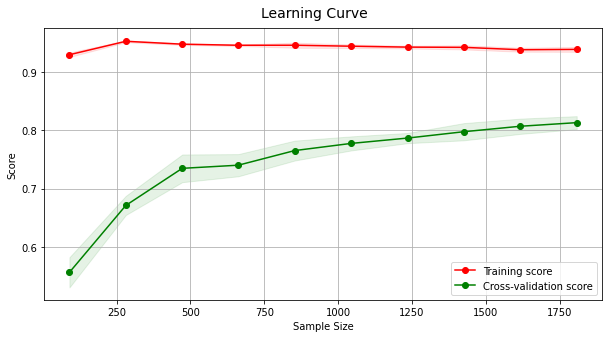

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle('Learning Curve', fontsize=14, y=0.94)
axes.plot(learn_train_sizes, learn_train_scores_mean, "o-", color="r", label="Training score")
axes.fill_between(learn_train_sizes,
                  learn_train_scores_mean - learn_train_scores_std,
                  learn_train_scores_mean + learn_train_scores_std,
                  alpha=0.1,
                  color="r")
axes.plot(learn_train_sizes, learn_test_scores_mean, "o-", color="g", label="Cross-validation score")
axes.fill_between(learn_train_sizes,
                  learn_test_scores_mean - learn_test_scores_std,
                  learn_test_scores_mean + learn_test_scores_std,
                  alpha=0.1,
                  color="g")
axes.legend()
# axes.set_ylim(0.8, 1)
axes.set_xlabel('Sample Size')
axes.set_ylabel('Score')
axes.grid()

## 3.4 Model Testing

In [43]:
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

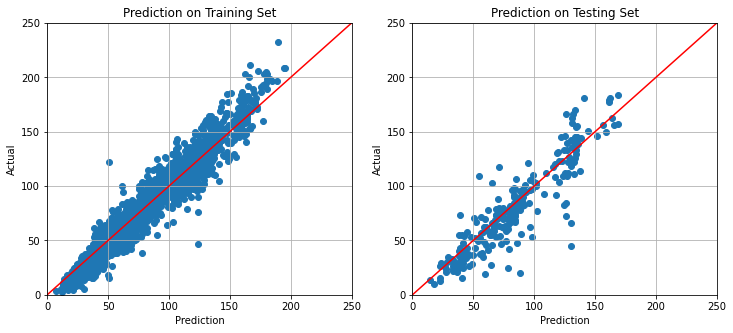

In [44]:
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax_1.set_title('Prediction on Training Set')
ax_1.scatter(y_pred_train, y_train)
ax_1.set_xlim(0,250)
ax_1.set_ylim(0,250)
ax_1.set_xlabel('Prediction')
ax_1.set_ylabel('Actual')
ax_1.plot([0,250], [0,250], color='red')
ax_1.grid()

ax_2.set_title('Prediction on Testing Set')
ax_2.scatter(y_pred_test, y_test)
ax_2.set_xlim(0,250)
ax_2.set_ylim(0,250)
ax_2.set_xlabel('Prediction')
ax_2.set_ylabel('Actual')
ax_2.plot([0,250], [0,250], color='red')
ax_2.grid()

plt.show()

In [59]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_test, y_pred_test, squared=True)
r2 = metrics.r2_score(y_test, y_pred_test)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_test)
print(f'RMSE Test: {rmse}')
print(f'R^2 Test: {r2}')
print(f'MAPE Test: {mape}')

RMSE Test: 308.12899049138
R^2 Test: 0.8191024469695354
MAPE Test: 0.21915630228704025


# 4. Model Inspection

## 4.1 Permutation Feature Importance

In [46]:
from sklearn.inspection import permutation_importance

r = permutation_importance(best_model, 
                           X_test, 
                           y_test,
                           n_repeats=30)

for i in r.importances_mean.argsort()[::-1]:
  print(f'{X_train.columns[i]:<8}\t'
        f'{r.importances_mean[i]:.3f}'
        f' +/- {r.importances_std[i]:.3f}')

TMD (m) 	0.740 +/- 0.069
RETURN (%)	0.135 +/- 0.026
SPP (psi)	0.125 +/- 0.017
WOB (ton)	0.120 +/- 0.017
RPM (rpm)	0.117 +/- 0.024
MW OUT (ppg)	0.057 +/- 0.010
FR (gpm)	0.034 +/- 0.007
MW IN (ppg)	0.024 +/- 0.006


In [47]:
tree_feature_importances = r.importances_mean
sorted_idx = tree_feature_importances.argsort()

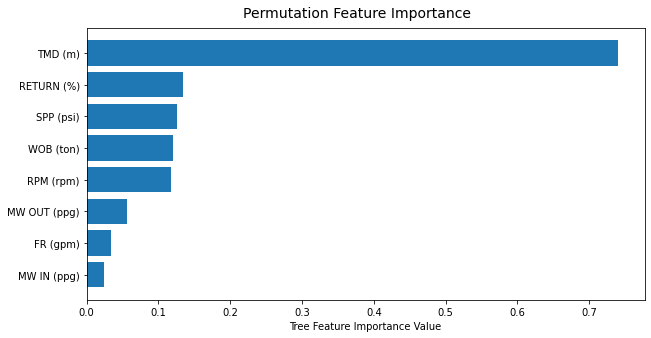

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Permutation Feature Importance', fontsize=14, y=0.94)
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X_train.columns[sorted_idx])
ax.set_xlabel('Tree Feature Importance Value')
plt.show()

## 4.2 Partial Dependece Plot (One Way)

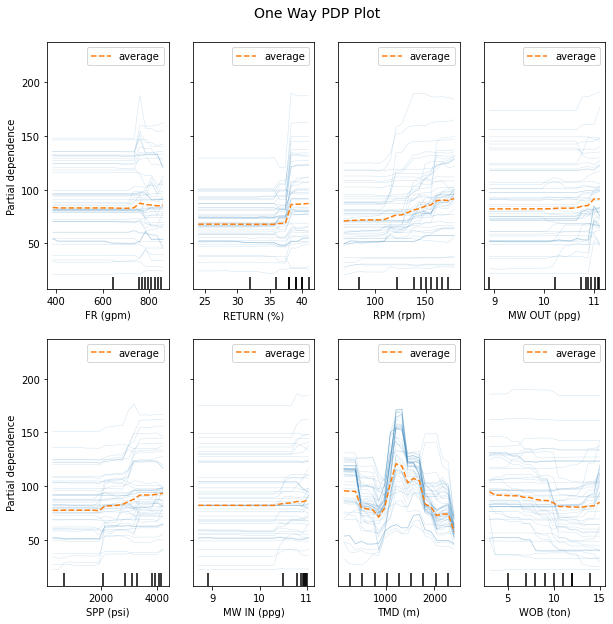

In [49]:
from sklearn.inspection import PartialDependenceDisplay

features = X_train.columns
fig_pdp, ax = plt.subplots(ncols=4, nrows=2, figsize=(10, 10))
fig_pdp.suptitle('One Way PDP Plot', fontsize=14, y=0.93)
display = PartialDependenceDisplay.from_estimator(best_model, 
                                                  pd.DataFrame(X_train, columns=features), 
                                                  features,
                                                  kind="both",
                                                  subsample=50,
                                                  n_jobs=3,
                                                  grid_resolution=20,
                                                  random_state=0,
                                                  ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
                                                  pd_line_kw={"color": "tab:orange", "linestyle": "--"},
                                                  ax=ax)

## 4.3 Blind Testing on UP-5 Well

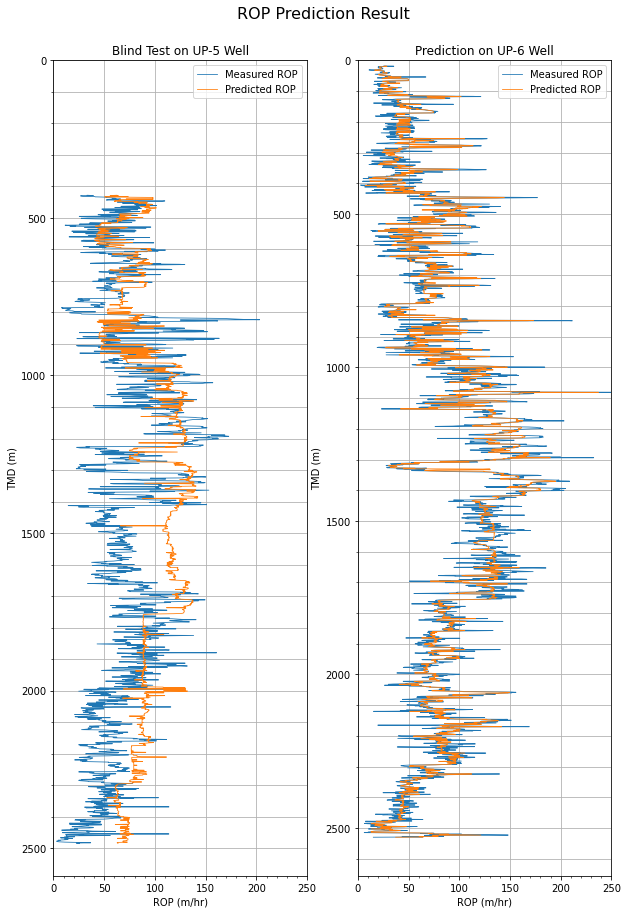

In [50]:
result_ROP_1 = best_model.predict(df_init_1[parameters])
result_ROP_2 = best_model.predict(df_init_2[parameters])

fig, [ax_1, ax_2] = plt.subplots(ncols=2, nrows=1, figsize=(10,15))
fig.suptitle('ROP Prediction Result', y=0.93, fontsize=16)

ax_1.set_title('Blind Test on UP-5 Well')
ax_1.plot(df_init_1['ROP (m/hr)'], df_init_1['TMD (m)'], label='Measured ROP', linewidth=0.8)
ax_1.plot(result_ROP_1, df_init_1['TMD (m)'], label='Predicted ROP', linewidth=0.8)
ax_1.set_xlabel('ROP (m/hr)')
ax_1.set_ylabel('TMD (m)')
ax_1.set_ylim(0)
ax_1.invert_yaxis()
ax_1.set_xlim(0, 250)
ax_1.minorticks_on()
ax_1.grid(visible=True, which='both', axis='y')
ax_1.grid(visible=True, which='major', axis='x')
ax_1.legend()

ax_2.set_title('Prediction on UP-6 Well')
ax_2.plot(df_init_2['ROP (m/hr)'], df_init_2['TMD (m)'], label='Measured ROP', linewidth=0.8)
ax_2.plot(result_ROP_2, df_init_2['TMD (m)'], label='Predicted ROP', linewidth=0.8)
ax_2.set_xlabel('ROP (m/hr)')
ax_2.set_ylabel('TMD (m)')
ax_2.set_ylim(0)
ax_2.invert_yaxis()
ax_2.set_xlim(0, 250)
ax_2.minorticks_on()
ax_2.grid(visible=True, which='both', axis='y')
ax_2.grid(visible=True, which='major', axis='x')
ax_2.legend()

plt.show()

In [58]:
X_blind = df_init_2[parameters]
y_blind = df_init_2['ROP (m/hr)']
y_pred_blind = best_model.predict(X_blind)

r2_blind = metrics.r2_score(y_blind, y_pred_blind)
rmse_blind = metrics.mean_squared_error(y_blind, y_pred_blind)
mape_blind = metrics.mean_absolute_percentage_error(y_blind, y_pred_blind)

print(f'R^2 blind: {r2_blind}')
print(f'RMSE blind: {rmse_blind}')
print(f'MAPE blind: {mape_blind}')

R^2 blind: 0.9248435041811158
RMSE blind: 137.70571046558186
MAPE blind: 0.1430362756163858
